In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [5]:
!ls german-traffic-signs/

signnames.csv  test.p  train.p	valid.p


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle as pkl

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [0]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [0]:
with open('german-traffic-signs/train.p','rb') as f:
  train_data = pkl.load(f)
  
with open('german-traffic-signs/test.p','rb') as f:
  test_data = pkl.load(f)
  
with open('german-traffic-signs/valid.p','rb') as f:
  val_data = pkl.load(f)
  
X_train,y_train = train_data['features'],train_data['labels']
X_test,y_test = test_data['features'],test_data['labels']
X_val,y_val = val_data['features'],val_data['labels']

In [9]:
train_data.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [13]:
y_train[0]

41

In [0]:
import pandas as pd
import random

data = pd.read_csv('german-traffic-signs/signnames.csv')

In [15]:
data.tail()

,ClassId,SignName
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vechiles over 3.5 metric ...


In [16]:
len(y_train)

34799

In [17]:
x_set=X_train[y_train==0]
random.randint(1,10)
len(x_set)

180

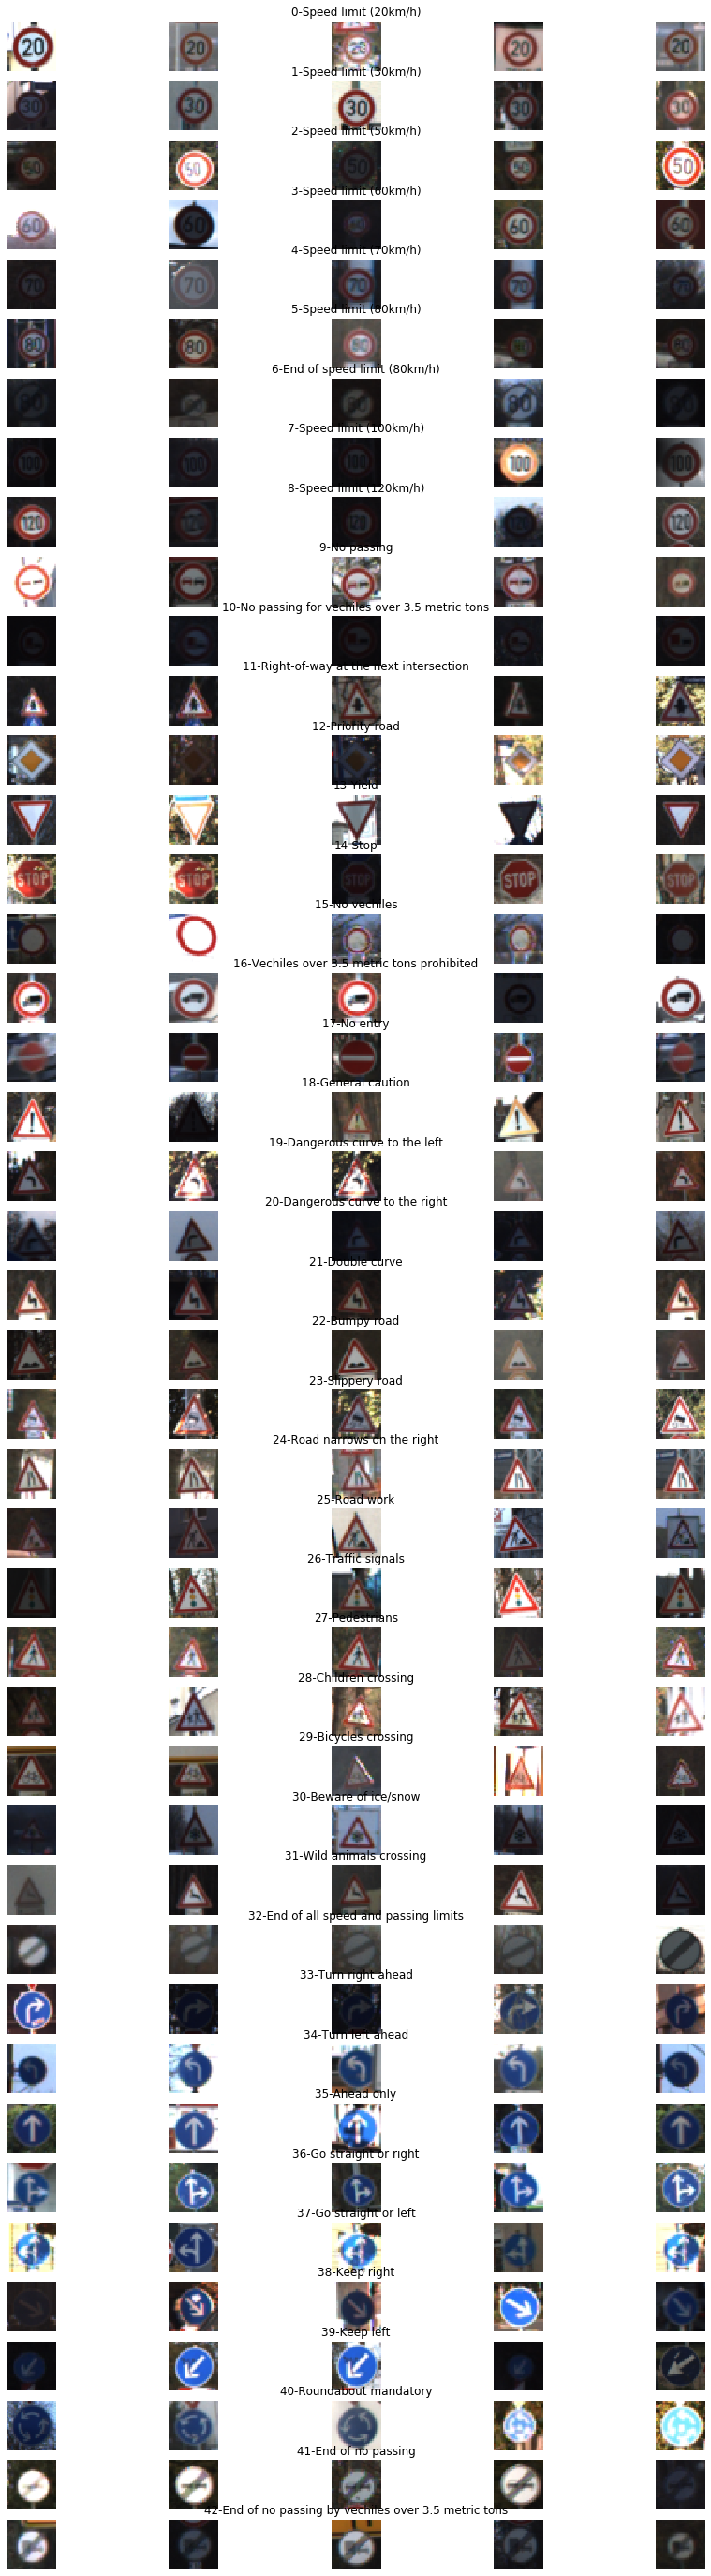

In [18]:
num_of_samples=[]
 
cols = 5
num_classes = 43
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(15,50))

for i in range(cols):
    for j,raw in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap='gray')
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j)+'-'+raw['SignName'])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


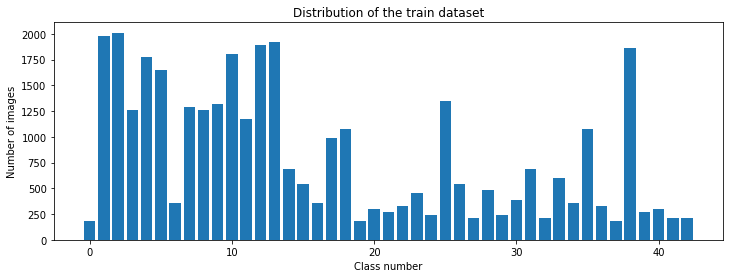

In [19]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
36


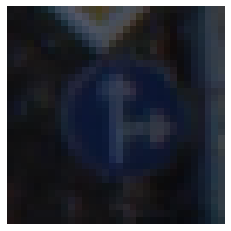

In [20]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

In [0]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
  

(32, 32)


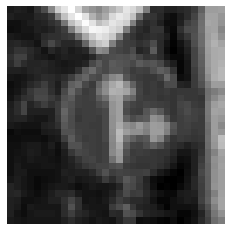

In [22]:
img = grayscale(X_train[1000])
plt.imshow(img, cmap='gray')
plt.axis("off")
print(img.shape)

In [0]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img

(32, 32)


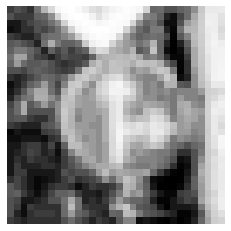

In [24]:
img = equalize(img)
plt.imshow(img, cmap='gray')
plt.axis("off")
print(img.shape)

In [0]:
def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [0]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))

In [0]:
len(num_of_samples)

43

(34799, 32, 32)


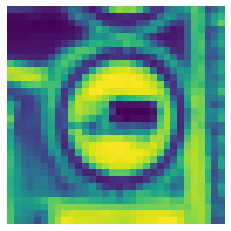

In [27]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)

In [0]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(X_train)

In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
y_val = to_categorical(y_val,43)

In [36]:
y_train.shape

(34799, 43)

In [0]:
def lenet():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(32, 32, 1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [32]:
lnet = lenet()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [33]:
lnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)              

In [37]:
history=lnet.fit(X_train,y_train,epochs=10,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 4410 samples
Epoch 1/10





34799/34799 [==============================] - 16s 460us/step - loss: 3.4406 - acc: 0.0758 - val_loss: 3.1402 - val_acc: 0.1660
Epoch 2/10
34799/34799 [==============================] - 1s 27us/step - loss: 1.5219 - acc: 0.5373 - val_loss: 0.7271 - val_acc: 0.7717
Epoch 3/10
34799/34799 [==============================] - 1s 27us/step - loss: 0.5797 - acc: 0.8106 - val_loss: 0.5062 - val_acc: 0.8365
Epoch 4/10
34799/34799 [==============================] - 1s 26us/step - loss: 0.3917 - acc: 0.8733 - val_loss: 0.3976 - val_acc: 0.8798
Epoch 5/10
34799/34799 [==============================] - 1s 25us/step - loss: 0.3297 - acc: 0.8945 - val_loss: 0.3735 - val_acc: 0.8823
Epoch 6/10
34799/34799 [==============================] - 1s 26us/step - loss: 0.2829 - acc: 0.9073 - val_loss: 0.3309 - val_acc: 0.9027
Epoch 7/10
34799/34799 [=

Text(0.5, 0, 'epoch')

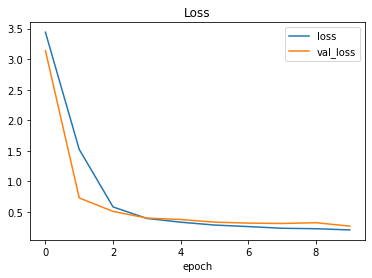

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

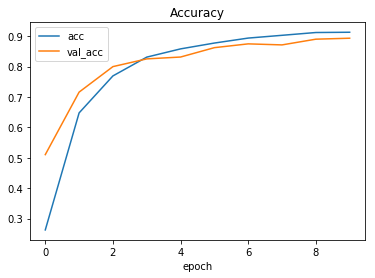

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [39]:
score = lnet.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.4318235090183815
Test accuracy: 0.8905779888775267


In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60,(5,5),input_shape=(32, 32, 1),activation='relu'))
  model.add(Conv2D(60,(5,5),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
 
  
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(Conv2D(30,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.5))
  
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [0]:
model = modified_model()

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 30)         

In [43]:
model = modified_model()
his =model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val),batch_size=400,verbose=1,shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 4s 124us/step - loss: 2.4374 - acc: 0.3430 - val_loss: 0.7065 - val_acc: 0.8138
Epoch 2/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.6968 - acc: 0.7835 - val_loss: 0.2762 - val_acc: 0.9150
Epoch 3/20
34799/34799 [==============================] - 3s 73us/step - loss: 0.4038 - acc: 0.8739 - val_loss: 0.1655 - val_acc: 0.9558
Epoch 4/20
34799/34799 [==============================] - 3s 73us/step - loss: 0.2892 - acc: 0.9111 - val_loss: 0.1220 - val_acc: 0.9698
Epoch 5/20
34799/34799 [==============================] - 3s 72us/step - loss: 0.2179 - acc: 0.9324 - val_loss: 0.1031 - val_acc: 0.9714
Epoch 6/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.1895 - acc: 0.9419 - val_loss: 0.0846 - val_acc: 0.9776
Epoch 7/20
34799/34799 [==============================] - 3s 74us/step - loss: 0.1608 - acc: 0.9509 - val_loss: 0.0806 - val_acc

In [0]:
model.save("trafic_sign_model.h5")

In [0]:
!ls

german-traffic-signs  sample_data  trafic_sign_model.h5


In [0]:
from google.colab import files

In [0]:
files.download("trafic_sign_model.h5")

In [0]:
files.upload()

{}